# Keras Classification Project

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

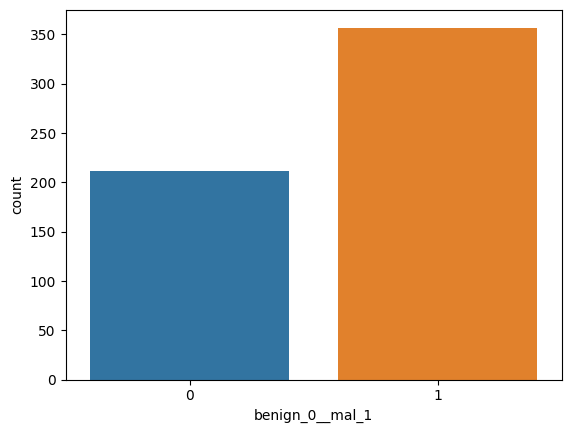

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot: >

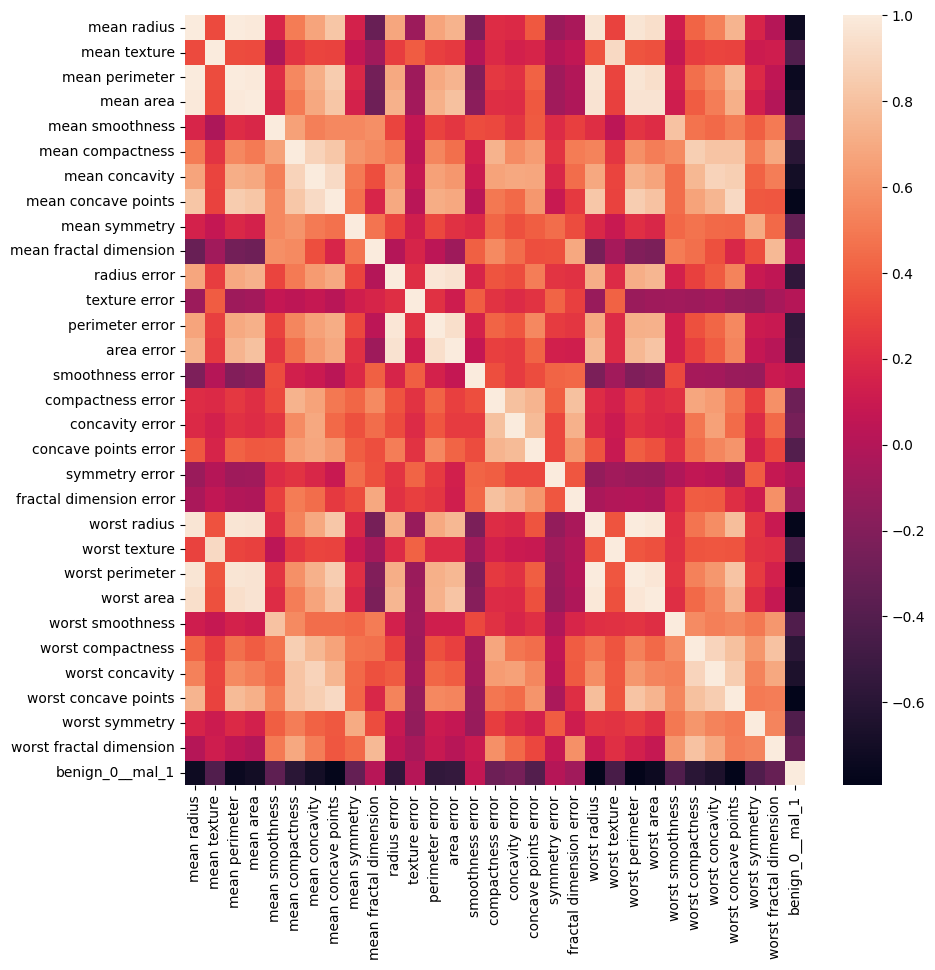

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot: >

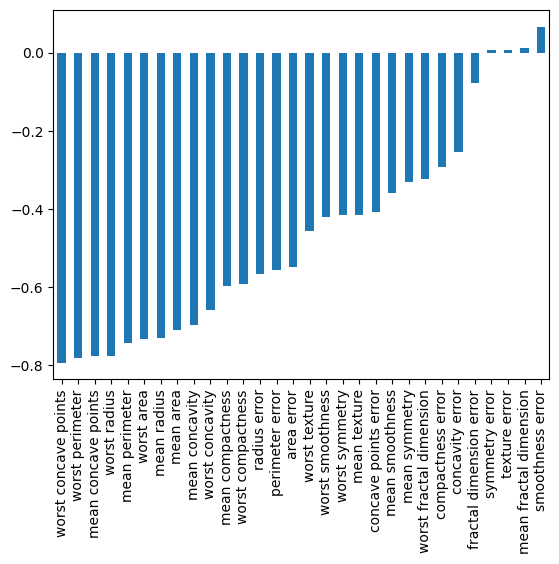

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [18]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
#dropout()
model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [20]:
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 2s 34ms/step - loss: 0.6812 - val_loss: 0.6645
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6005 - val_loss: 0.6129
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5395 - val_loss: 0.5768
Epoch 4/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4980 - val_loss: 0.5529
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4648 - val_loss: 0.5283
Epoch 6/600
14/14 [==============================] - 0s 13ms/step - loss: 0.4391 - val_loss: 0.5017
Epoch 7/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4152 - val_loss: 0.4760
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3911 - val_loss: 0.4510
Epoch 9/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3696 - val_loss: 0.4182
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3452 - val_loss: 0.3950

14/14 [==============================] - 0s 9ms/step - loss: 0.0972 - val_loss: 0.2236
Epoch 83/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0975 - val_loss: 0.2303
Epoch 84/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0976 - val_loss: 0.2255
Epoch 85/600
14/14 [==============================] - 1s 59ms/step - loss: 0.0991 - val_loss: 0.2282
Epoch 86/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0988 - val_loss: 0.2474
Epoch 87/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0965 - val_loss: 0.2328
Epoch 88/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0968 - val_loss: 0.2445
Epoch 89/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0986 - val_loss: 0.2455
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0947 - val_loss: 0.2311
Epoch 91/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0967 - val_loss: 0.2311
Epoch 

Epoch 163/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0799 - val_loss: 0.2488
Epoch 164/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0802 - val_loss: 0.2495
Epoch 165/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0801 - val_loss: 0.2826
Epoch 166/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0762 - val_loss: 0.2517
Epoch 167/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0798 - val_loss: 0.2811
Epoch 168/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0801 - val_loss: 0.2778
Epoch 169/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0781 - val_loss: 0.2687
Epoch 170/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0783 - val_loss: 0.2817
Epoch 171/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0799 - val_loss: 0.2743
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0811 - val

14/14 [==============================] - 0s 7ms/step - loss: 0.0641 - val_loss: 0.3324
Epoch 244/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0625 - val_loss: 0.3444
Epoch 245/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0629 - val_loss: 0.3534
Epoch 246/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0633 - val_loss: 0.3406
Epoch 247/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0677 - val_loss: 0.3322
Epoch 248/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0617 - val_loss: 0.3604
Epoch 249/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0620 - val_loss: 0.3559
Epoch 250/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0628 - val_loss: 0.3480
Epoch 251/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0600 - val_loss: 0.3520
Epoch 252/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0617 - val_loss: 0.3452
Epo

Epoch 324/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0464 - val_loss: 0.4227
Epoch 325/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0490 - val_loss: 0.4316
Epoch 326/600
14/14 [==============================] - 1s 53ms/step - loss: 0.0445 - val_loss: 0.4518
Epoch 327/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0448 - val_loss: 0.4626
Epoch 328/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0445 - val_loss: 0.4748
Epoch 329/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0469 - val_loss: 0.4683
Epoch 330/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0449 - val_loss: 0.4692
Epoch 331/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0426 - val_loss: 0.4814
Epoch 332/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0435 - val_loss: 0.4462
Epoch 333/600
14/14 [==============================] - 0s 24ms/step - loss: 0.0452 -

14/14 [==============================] - 0s 10ms/step - loss: 0.0314 - val_loss: 0.6166
Epoch 405/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0355 - val_loss: 0.6027
Epoch 406/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0342 - val_loss: 0.5938
Epoch 407/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0316 - val_loss: 0.5996
Epoch 408/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0323 - val_loss: 0.6110
Epoch 409/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0306 - val_loss: 0.6102
Epoch 410/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0328 - val_loss: 0.6101
Epoch 411/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0302 - val_loss: 0.6109
Epoch 412/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0346 - val_loss: 0.6264
Epoch 413/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0337 - val_loss: 0.6182

Epoch 485/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0279 - val_loss: 0.7472
Epoch 486/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0232 - val_loss: 0.7099
Epoch 487/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0224 - val_loss: 0.7357
Epoch 488/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0223 - val_loss: 0.7125
Epoch 489/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0267 - val_loss: 0.7215
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0264 - val_loss: 0.7144
Epoch 491/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0224 - val_loss: 0.7110
Epoch 492/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0231 - val_loss: 0.7068
Epoch 493/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0241 - val_loss: 0.7464
Epoch 494/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0312 -

14/14 [==============================] - 0s 10ms/step - loss: 0.0162 - val_loss: 0.7892
Epoch 566/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0160 - val_loss: 0.7868
Epoch 567/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0161 - val_loss: 0.7871
Epoch 568/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0150 - val_loss: 0.7914
Epoch 569/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.7911
Epoch 570/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0151 - val_loss: 0.7925
Epoch 571/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0143 - val_loss: 0.7856
Epoch 572/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0141 - val_loss: 0.7849
Epoch 573/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0136 - val_loss: 0.7913
Epoch 574/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0136 - val_loss: 0.803

In [21]:
model_loss = pd.DataFrame(model.history.history)

In [22]:
model_loss

,loss,val_loss
0,0.681161,0.664475
1,0.600535,0.612873
2,0.539465,0.576756
3,0.498029,0.552884
4,0.464756,0.528338
...,...,...
595,0.012217,0.819524
596,0.017264,0.825900
597,0.012127,0.818540
598,0.012444,0.826124


<AxesSubplot: >

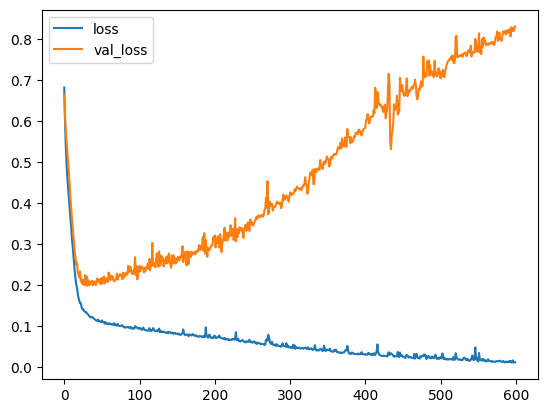

In [23]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [24]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [27]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [28]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 26ms/step - loss: 0.6454 - val_loss: 0.6522
Epoch 2/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5334 - val_loss: 0.5661
Epoch 3/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4698 - val_loss: 0.5006
Epoch 4/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4268 - val_loss: 0.4621
Epoch 5/600
14/14 [==============================] - 0s 21ms/step - loss: 0.3873 - val_loss: 0.4234
Epoch 6/600
14/14 [==============================] - 0s 18ms/step - loss: 0.3592 - val_loss: 0.3875
Epoch 7/600
14/14 [==============================] - 0s 20ms/step - loss: 0.3265 - val_loss: 0.3561
Epoch 8/600
14/14 [==============================] - 0s 14ms/step - loss: 0.2991 - val_loss: 0.3306
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.2747 - val_loss: 0.3107
Epoch 10/600
14/14 [==============================] - 0s 13ms/step - loss: 0.2548 - val_loss: 0.2944

<AxesSubplot: >

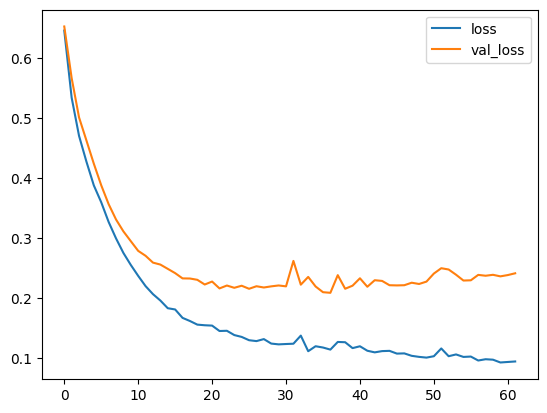

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [32]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 31ms/step - loss: 1.9840 - val_loss: 1.0781
Epoch 2/600
14/14 [==============================] - 0s 14ms/step - loss: 1.4463 - val_loss: 0.8202
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.9924 - val_loss: 0.7209
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.8795 - val_loss: 0.6954
Epoch 5/600
14/14 [==============================] - 0s 14ms/step - loss: 0.8371 - val_loss: 0.6853
Epoch 6/600
14/14 [==============================] - 0s 13ms/step - loss: 0.7901 - val_loss: 0.6779
Epoch 7/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6942 - val_loss: 0.6680
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6881 - val_loss: 0.6591
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7058 - val_loss: 0.6501
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6542 - val_loss: 0.6434

14/14 [==============================] - 0s 8ms/step - loss: 0.2318 - val_loss: 0.1990
Epoch 83/600
14/14 [==============================] - 0s 11ms/step - loss: 0.2337 - val_loss: 0.2033
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2314 - val_loss: 0.1995
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2727 - val_loss: 0.2006
Epoch 86/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2324 - val_loss: 0.1964
Epoch 87/600
14/14 [==============================] - 0s 11ms/step - loss: 0.2186 - val_loss: 0.1975
Epoch 88/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2405 - val_loss: 0.1940
Epoch 89/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2244 - val_loss: 0.1949
Epoch 90/600
14/14 [==============================] - 0s 15ms/step - loss: 0.2202 - val_loss: 0.1985
Epoch 91/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2152 - val_loss: 0.1934
Epoch 9

<AxesSubplot: >

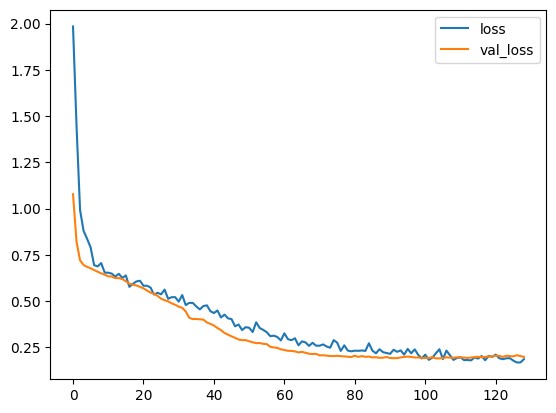

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [34]:
predict_x = model.predict(X_test)
predict_x

5/5 [==============================] - 0s 17ms/step


array([[9.55194235e-01],
       [9.85603929e-01],
       [9.54452872e-01],
       [5.59051633e-01],
       [9.98691201e-01],
       [9.87981558e-01],
       [9.97842610e-01],
       [5.37237611e-07],
       [9.66031551e-01],
       [9.84069705e-01],
       [3.29659996e-03],
       [9.76786196e-01],
       [9.30618405e-01],
       [9.99342322e-01],
       [4.59498074e-03],
       [9.99906898e-01],
       [9.66872096e-01],
       [9.97960985e-01],
       [5.12072875e-04],
       [7.86405653e-02],
       [9.84378576e-01],
       [9.99975622e-01],
       [9.48073030e-01],
       [9.91620541e-01],
       [6.97462112e-02],
       [9.91568148e-01],
       [6.11230964e-03],
       [9.98907030e-01],
       [3.37312394e-03],
       [3.51248612e-03],
       [1.26915276e-01],
       [3.56631284e-03],
       [6.75568998e-01],
       [8.60206962e-01],
       [9.89033520e-01],
       [9.97779548e-01],
       [2.45970532e-01],
       [6.36568367e-02],
       [5.28250402e-03],
       [1.01920799e-04],


In [35]:
predict_x.min()

3.3945196e-07

In [36]:
predict_x.max()

1.0

In [37]:
predict_x.mean()

0.6053164

In [38]:
predict_x.shape

(143, 1)

In [40]:
predictions = pd.Series(predict_x.reshape(143))

In [41]:
predictions = predictions.apply(lambda x: 1 if x>0.5 else 0)

In [42]:
predictions

0      1
1      1
2      1
3      1
4      1
      ..
138    0
139    1
140    1
141    1
142    0
Length: 143, dtype: int64

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        55
           1       0.93      0.93      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [45]:
print(confusion_matrix(y_test,predictions))

[[49  6]
 [ 6 82]]
